# MNIST Digit Recognition

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image.

In [185]:
from IPython.display import Image
from IPython.core.display import HTML 

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Package to filter warnings
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

In [5]:
def display_all(df,num_rows=10):
    with pd.option_context("display.max_rows",num_rows):
        with pd.option_context("display.max_columns",500):
            display(df.head(num_rows))

## Reading and Understanding the data :

In [6]:
digit = pd.read_csv('train.csv')
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
display_all(digit)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

In [8]:
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
digit.shape

(42000, 785)

In [10]:
digit.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [21]:
#Check if there are any nulls
digit.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [22]:
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [53]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.gray,interpolation="nearest")
    plt.axis("off")

Digit : 4


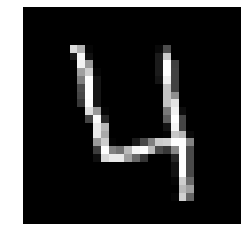

In [54]:
# plot a random digit
some_digit = digit.iloc[3,1:].values
plot_digit(some_digit)
print("Digit : {}".format(digit.iloc[3,0]))

In [143]:
#define a function to draw the image
def draw_digits(x,y, label='Actual'):
    plt.figure(figsize=(20,5))
    nrows=(len(x)//10)+1
    ncols=10
    print('Length of input: {}, nrows: {}, ncols: {}, label: {}'.format(len(x), nrows, ncols, y.shape))
   
    for idx,i in enumerate(x.index):
        #loop to iterate over blocks of 10 digits            
            plt.subplot(nrows,10,idx+1)  #subplots start with 1
            plt.subplots_adjust(top=1.3)
            plt.imshow(x.loc[i].values.reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
            plt.title(label+' %i\n' % y.iloc[idx,:].values, fontsize = 11)           
    plt.show()

Length of input: 20, nrows: 3, ncols: 10, label: (20, 1)


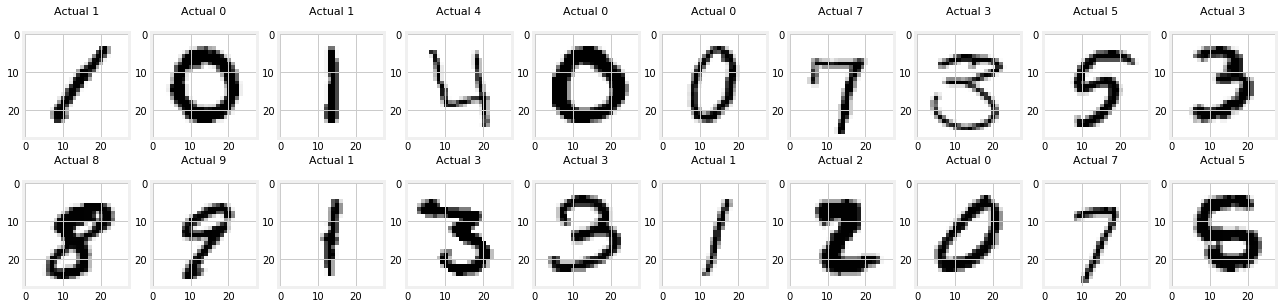

In [144]:
# Draw the first 20 digits in the dataset
draw_digits(digit.iloc[:20,1:], digit.iloc[:20,:1],'Actual')

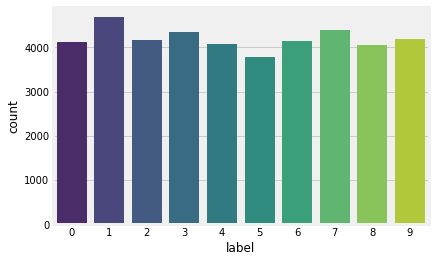

In [50]:
#check the distribution of dataset labels
sns.countplot(digit['label'], palette='viridis')
plt.show()

We could see that there is a uniform distribution of different classes, and there is no class imbalance or skewness.

## Model Preparation :

Since the training data is huge and fitting a model on the whole dataset will be computationally very expensive, we will take a sample of 20% of the data to train our model.

In [59]:
# Separating the label and the features
X = digit.drop('label', axis=1)
y = digit['label']

In [60]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

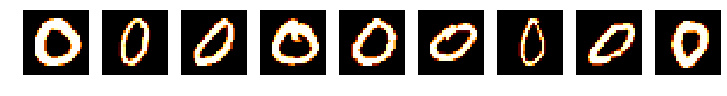

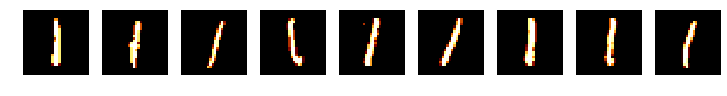

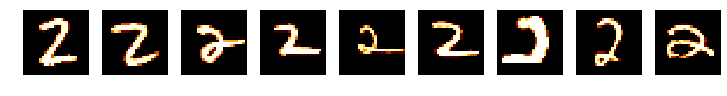

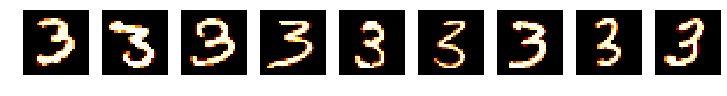

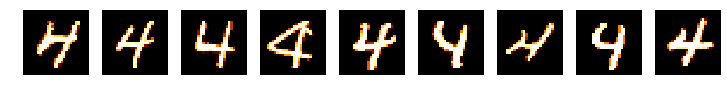

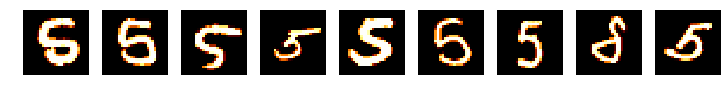

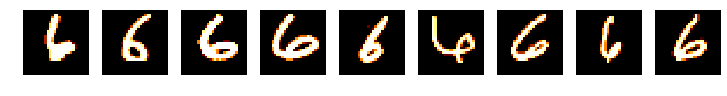

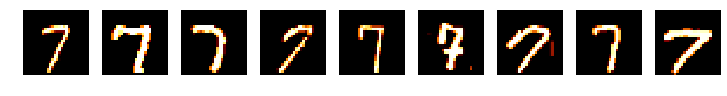

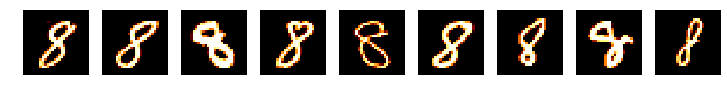

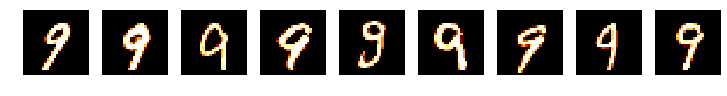

In [77]:
label = digit.label
for x in range(10):
    train_0=X[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,10):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='afmhot')
        plt.axis('off')

In [15]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

**Take a subset of the data**

In [150]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.2,random_state = 101,stratify=y)

In [151]:
print("Train Data Shape : {}".format(X_train.shape))

Train Data Shape : (8400, 784)


In [152]:
y_train.shape

(8400,)

In [153]:
print("Test Data Shape : {}".format(X_test.shape))

Test Data Shape : (33600, 784)


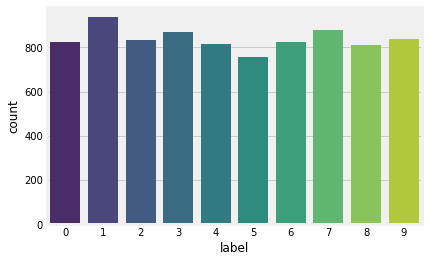

In [154]:
#check the distribution of dataset labels in the subset
sns.countplot(y_train, palette='viridis')
plt.show()

**Scale the data**

In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [156]:
X_test_non_scaled = X_test.copy()
X_test = scaler.transform(X_test)

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [71]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [74]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9104464285714285 

[[3213    0   11    2   11   30   22    4   11    2]
 [   1 3665   12   11    4    6    3    7   30    8]
 [  37   50 2994   62   53   17   37   42   44    6]
 [  11   32  121 3023    7  152    6   24   72   33]
 [   5   14   51    5 3019    8   14   15    6  120]
 [  36   30   32  167   28 2642   31    6   45   19]
 [  41    2   34    2   37   58 3116    5   15    0]
 [   6   25   33   11   82    8    1 3201    6  148]
 [  26   57   62  132   26  100   19   20 2783   25]
 [  15   15   22   41  156   24    1  111   30 2935]]


The linear model gives approx. 91% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

### Non-Linear SVM : RBF Kernel

In [75]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [76]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9330952380952381 

[[3196    0   29    6    6   15   36    3   14    1]
 [   0 3670   29    9    7    5    5    4   14    4]
 [  20   24 3145   31   30    1   15   34   38    4]
 [   3   19  106 3164    5   52    3   52   57   20]
 [   3    8   61    2 3081    7   15    9    3   68]
 [  22   14   38  100   15 2751   35    7   31   23]
 [  26    3  121    1   12   47 3083    2   15    0]
 [   5   26   80    5   30    1    0 3270    6   98]
 [  11   30   38   44   16   58   19   16 3001   17]
 [  12   10   45   53   89   10    0  112   28 2991]]


The non-linear model gives approx. 93% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

**Hyperparameter Tuning :**

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [25]:
params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = SVC()

model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)

In [26]:
model_cv.fit(X_train, y_train)  

In [78]:
#saving the model to a file so that it can be reused later
#import pickle
#with open('/content/drive/My Drive/svm_rbf.pkl', 'wb') as pkobj:
    #pickle.dump(model_cv, pkobj)

In [79]:
#with open('svm_rbf.pkl', 'rb') as pkobj:
    #model_cv = pickle.load(pkobj)

In [80]:
model_cv.best_params_

{'C': 100, 'gamma': 0.001}

In [81]:
model_cv.best_score_

0.9398809523809524

In [82]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,93.802678,1.152905,13.865540,0.324566,1,0.01,"{'C': 1, 'gamma': 0.01}",0.747024,0.732738,0.732143,...,0.745476,0.011564,12,0.999554,0.999851,0.999702,0.999702,0.999851,0.999732,0.000111
1,22.967378,0.396698,7.823328,0.563984,1,0.001,"{'C': 1, 'gamma': 0.001}",0.920833,0.929762,0.938095,...,0.929405,0.005515,4,0.976042,0.974554,0.972470,0.973214,0.973065,0.973869,0.001282
2,33.955854,0.533806,10.634614,0.184735,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.892262,0.902976,0.895238,...,0.902143,0.007402,8,0.918750,0.915179,0.916815,0.913839,0.916071,0.916131,0.001643
3,96.077635,0.924708,13.638799,0.334459,10,0.01,"{'C': 10, 'gamma': 0.01}",0.760119,0.749405,0.750595,...,0.760714,0.010031,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,20.076027,0.513644,6.980858,0.081709,10,0.001,"{'C': 10, 'gamma': 0.001}",0.931548,0.943452,0.945833,...,0.939524,0.005502,3,0.998958,0.999107,0.998512,0.998958,0.999107,0.998929,0.000219
5,15.930680,0.660529,6.498470,0.078716,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.919048,0.922024,0.930357,...,0.924167,0.003776,6,0.960417,0.959375,0.958631,0.958780,0.959970,0.959435,0.000683
6,97.512761,2.093400,13.572634,0.165798,100,0.01,"{'C': 100, 'gamma': 0.01}",0.760119,0.749405,0.750595,...,0.760714,0.010031,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,19.517543,0.274248,6.722278,0.275328,100,0.001,"{'C': 100, 'gamma': 0.001}",0.932143,0.944048,0.944048,...,0.939881,0.004994,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,11.422137,0.121287,4.814877,0.050545,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.922619,0.927976,0.927381,...,0.926667,0.002240,5,0.993452,0.993601,0.992560,0.994940,0.993601,0.993631,0.000761
9,95.701360,0.697512,13.536147,0.359857,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.760119,0.749405,0.750595,...,0.760714,0.010031,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


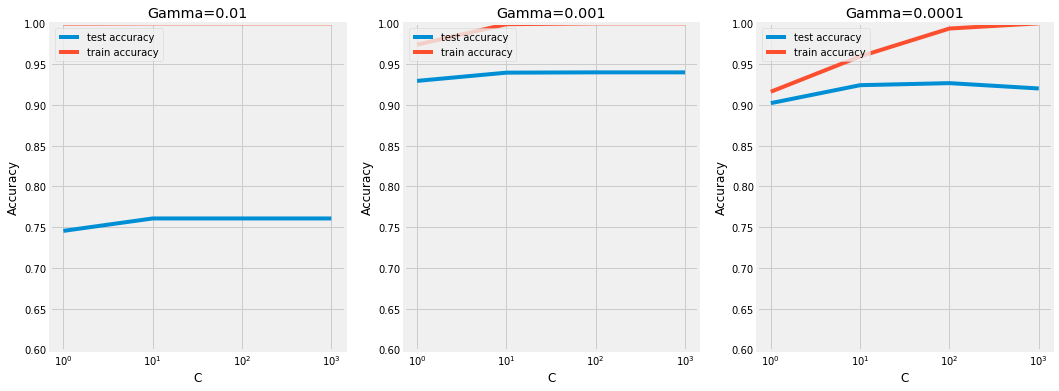

In [87]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

Let's now choose the best hyperparameters. 

In [88]:
clf = SVC(C=model_cv.best_params_['C'], gamma=model_cv.best_params_['gamma'], kernel='rbf', random_state=21)
clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=21, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
y_pred = clf.predict(X_test)

In [93]:
# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.9440773809523809 



In [94]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[3228,    0,   19,    3,    7,   10,   26,    4,    8,    1],
       [   0, 3682,   21,    8,    7,    3,    5,    6,   10,    5],
       [  18,   32, 3161,   36,   26,    4,   11,   32,   17,    5],
       [   6,   17,   92, 3204,    4,   51,    3,   40,   45,   19],
       [   5,   10,   45,    3, 3086,    3,   17,   12,    3,   73],
       [  17,   12,   26,   76,   13, 2822,   22,    8,   28,   12],
       [  24,    1,   99,    1,   16,   40, 3117,    3,    9,    0],
       [   5,   19,   59,   10,   35,    2,    0, 3326,    4,   61],
       [  10,   15,   40,   47,   16,   49,   16,   16, 3027,   14],
       [  10,    8,   38,   31,   71,   12,    0,   85,   27, 3068]],
      dtype=int64)

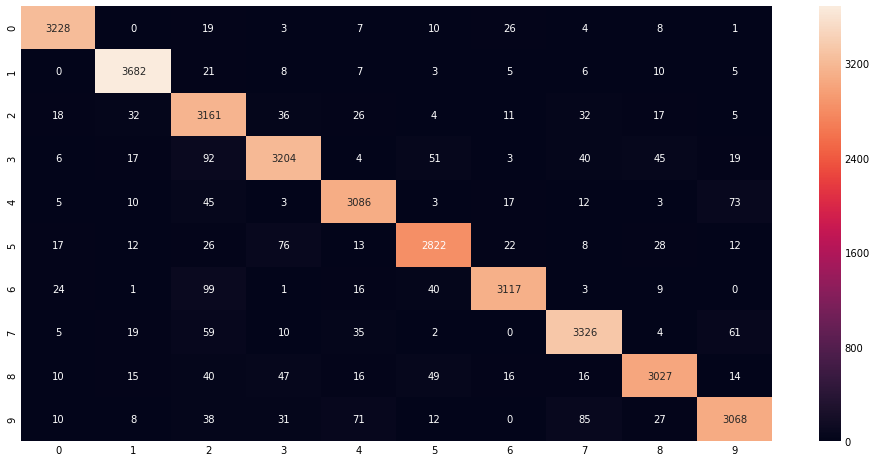

In [95]:
plt.figure(figsize=(15,8))
sns.heatmap(cmat, annot=True, fmt='g')

In [96]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3306
           1       0.97      0.98      0.98      3747
           2       0.88      0.95      0.91      3342
           3       0.94      0.92      0.93      3481
           4       0.94      0.95      0.94      3257
           5       0.94      0.93      0.94      3036
           6       0.97      0.94      0.96      3310
           7       0.94      0.94      0.94      3521
           8       0.95      0.93      0.94      3250
           9       0.94      0.92      0.93      3350

   micro avg       0.94      0.94      0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



**Visualize the predictions**

In [176]:
test_result = pd.concat([y_test, pd.Series(y_pred, name='predicted', index=y_test.index)],axis=1)
test_result.head()

,label,predicted
4284,6,6
7202,8,8
37230,5,5
25770,3,5
25802,7,7


In [177]:
pd.DataFrame(X_test_non_scaled).head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Length of input: 20, nrows: 3, ncols: 10, label: (20, 1)


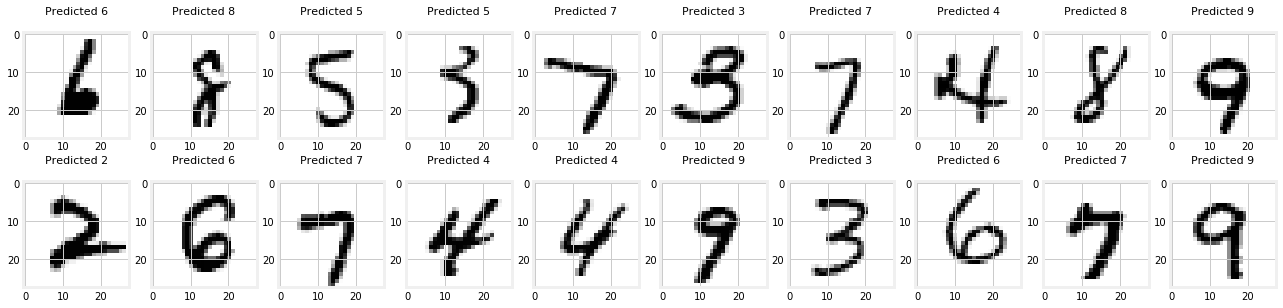

In [178]:
#Correctly identified labels
draw_digits(pd.DataFrame(X_test_non_scaled).iloc[:20,:],test_result.iloc[:20,1:],'Predicted')

In [168]:
incorrect_dig = test_result[test_result.label != test_result['predicted']].index

In [171]:
test_xypred = pd.concat([pd.DataFrame(X_test_non_scaled), test_result], axis=1)

In [172]:
test_xypred.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,predicted
4284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,6
7202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
37230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5
25770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5
25802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,7


In [173]:
test_xypred[test_xypred.label != test_xypred.predicted].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,predicted
25770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5
33725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,4
24481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,7
32683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,5
29973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,8


Length of input: 20, nrows: 3, ncols: 10, label: (20, 1)


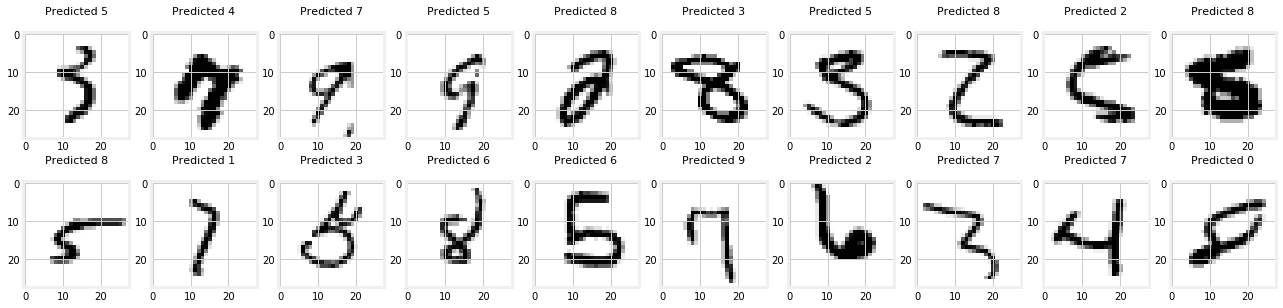

In [179]:
# Incorrectly predicted labels
draw_digits(test_xypred[test_xypred.label != test_xypred.predicted].iloc[:20,:784],\
           test_xypred[test_xypred.label != test_xypred.predicted].iloc[:20,785:],'Predicted')

In [180]:
print("Number of incorrect predictions : {}".format(len(incorrect_dig)))

Number of incorrect predictions : 1879


**Hence out of 33600 digits, 1879 digits were incorrectly predicted, achieving an accuracy of 94.4%. Thus we have achieved a good accuracy by only training the non-linear SVM model with rbf kernel on 20% of the data. If we would have trained on much more sample the accuracy would have been better.**

### Prediction on the unknown test data

The test data has no label, so inorder to evaluate the accuracy on test data we need to submit the prediction on kaggle.

In [97]:
test_data = pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
test_data = scaler.transform(test_data)

In [99]:
y_pred_final = clf.predict(test_data)

In [100]:
pd.Series(y_pred_final).value_counts()

1    3240
2    3011
7    2894
4    2793
0    2778
3    2774
9    2693
6    2679
8    2640
5    2498
dtype: int64

In [101]:
test_data.shape

(28000, 784)

Predicted label: 6


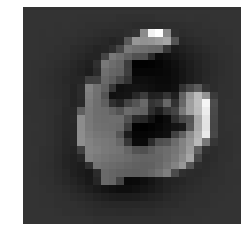

In [103]:
some_digit = test_data[500]
plot_digit(some_digit)
print("Predicted label: {}".format(y_pred_final[500]))

Hence we can see that the image for digit 6 has been identified correctly by the model.

**Creating submission file for Kaggle submission:**

In [181]:
id = np.arange(1,28001,1)
submission_df = pd.concat([pd.Series(id),pd.Series(y_pred_final)],axis=1)
submission_df.columns = ['ImageId','Label']
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [182]:
submission_df.to_csv('mnist_submission_svm_rbf.csv',index=False)

After submitting the csv file to Kaggle, got a score of 0.94442. So the model was able to achieve 94.4% accuracy even on the unknown test data.<br>
![title](svm_rbf.jpg)

### Non-Linear SVM : Poly Kernel

In [196]:
# Try with the poly kernel of SVM
params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = SVC(kernel='poly')

model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)

In [197]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 39.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [198]:
#with open('svm_poly.pkl', 'wb') as pkobj:
    #pickle.dump(model_cv, pkobj)

In [199]:
#with open('svm_poly.pkl', 'rb') as pkobj:
    #model_cv = pickle.load(pkobj)

In [200]:
model_cv.best_score_

0.9489285714285715

In [201]:
model_cv.best_params_

{'C': 1, 'gamma': 0.01}

In [202]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,63.520520,2.758151,9.755386,0.831472,1,0.01,"{'C': 1, 'gamma': 0.01}",0.939286,0.944048,0.954762,...,0.948929,0.006281,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,123.679110,5.608186,18.545918,2.121279,1,0.001,"{'C': 1, 'gamma': 0.001}",0.750595,0.735714,0.731548,...,0.744643,0.012446,8,0.800298,0.796726,0.791667,0.775893,0.816667,0.796250,0.013182
2,162.534328,3.862199,20.500171,2.057782,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.111310,0.106548,0.114286,...,0.111905,0.003894,12,0.115923,0.117113,0.115923,0.114881,0.116815,0.116131,0.000785
3,57.391841,0.931886,9.610103,0.239393,10,0.01,"{'C': 10, 'gamma': 0.01}",0.939286,0.944048,0.954762,...,0.948929,0.006281,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,63.388494,0.481928,10.417755,0.121468,10,0.001,"{'C': 10, 'gamma': 0.001}",0.911905,0.925595,0.932143,...,0.925952,0.007344,7,0.981696,0.981101,0.979762,0.979464,0.979911,0.980387,0.000859
5,153.852554,1.252951,18.306053,0.101849,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.115476,0.119048,0.122619,...,0.119167,0.003333,11,0.130655,0.130060,0.129911,0.129613,0.131250,0.130298,0.000585
6,56.452636,1.073111,9.504509,0.079785,100,0.01,"{'C': 100, 'gamma': 0.01}",0.939286,0.944048,0.954762,...,0.948929,0.006281,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,53.523357,0.677636,9.023318,0.074289,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939286,0.944048,0.952976,...,0.948571,0.005983,6,0.999702,0.999851,0.999554,0.999851,0.999851,0.999762,0.000119
8,138.198086,0.781150,16.756631,0.175069,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.213690,0.232738,0.216667,...,0.225238,0.008313,10,0.251339,0.250298,0.251190,0.246280,0.244940,0.248810,0.002670
9,53.869145,1.099869,9.055634,0.073442,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.939286,0.944048,0.954762,...,0.948929,0.006281,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


**Fitting the best model**

In [203]:
clf = SVC(C=model_cv.best_params_['C'], gamma=model_cv.best_params_['gamma'], kernel='poly', random_state=21)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=21, shrinking=True,
  tol=0.001, verbose=False)

In [204]:
y_pred = clf.predict(X_test)

In [205]:
metrics.accuracy_score(y_test, y_pred)

0.9536904761904762

In [206]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3306
           1       0.99      0.99      0.99      3747
           2       0.96      0.93      0.94      3342
           3       0.95      0.94      0.95      3481
           4       0.93      0.97      0.95      3257
           5       0.95      0.94      0.94      3036
           6       0.98      0.96      0.97      3310
           7       0.96      0.94      0.95      3521
           8       0.90      0.96      0.93      3250
           9       0.93      0.93      0.93      3350

   micro avg       0.95      0.95      0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



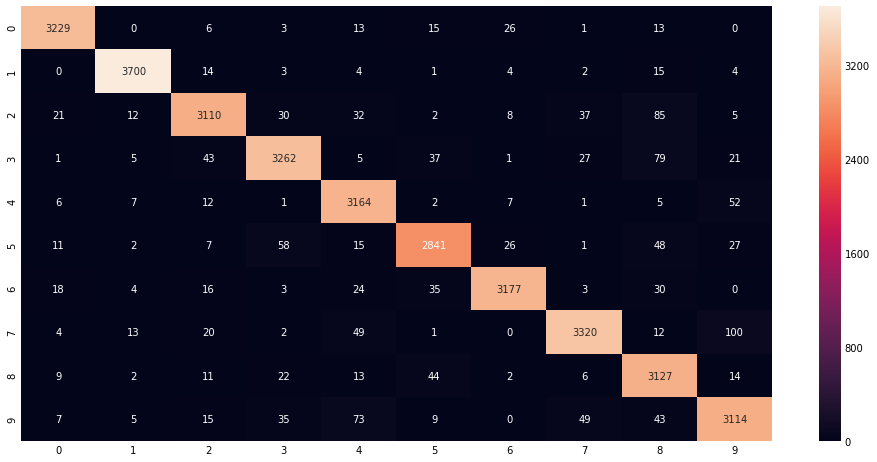

In [208]:
plt.figure(figsize=(15,8))
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot=True, fmt='g')

Hence by using poly kernel we are getting a accuracy of 0.95 compared to accuracy obtained 0.94 on using the rbf kernel. We will now use this model to predict on the unseen test.csv data.

In [210]:
y_pred_svm_poly = clf.predict(test_data)

In [211]:
id = np.arange(1,28001,1)
submission_df = pd.concat([pd.Series(id),pd.Series(y_pred_svm_poly)],axis=1)
submission_df.columns = ['ImageId','Label']
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [212]:
submission_df.to_csv('mnist_submission_svm_poly.csv',index=False)

After submitting the csv file to Kaggle, got a score of 0.95514. So the model was able to achieve 95.5% accuracy even on the unknown test data.<br>
![title](svm_poly.jpg)

## Conclusion :

We trained different SVM models on a subset(20%) of the MNIST train dataset and tried to classify the images on the rest of the dataset. We took a sample of data and trained our model to avoid huge computation cost.

We found that with linear model we were able to achieve 91% accuracy, while with basic non-linear model we were able to achieve 93% accuracy. So we went forward with non-linear model and did hyperparameter tuning to obtain the best model.

We also predicted the labels on the test data supplied by Kaggle and submitted the predictions to get the score from Kaggle.

Below is a comaprison of the accuracy obtained from different non-linear models :
    
<table style="width:50%">
  <tr>
    <th>SVM Kernel</th>
    <th>Accuracy on the test data</th> 
    <th>Accuracy on Kagggle test data</th>
  </tr>
  <tr>
    <td>rbf</td>
    <td>0.94</td> 
    <td>0.944</td>
  </tr>
  <tr>
    <td>poly</td>
    <td>0.95</td> 
    <td>0.955</td>
  </tr>
</table>

Hence we can conclude that the SVM non-linear model with poly kernel was able to achieve higher accuracy.

# Extra : Performance of ML models other than SVM

Here we will try some other machine learning classification models apart from SVM just to check the performance on the training data.

**Random Forest Classifier :**

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(max_depth=100,n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
y_pred = rfc.predict(X_test)

In [78]:
metrics.accuracy_score(y_test, y_pred)

0.9469940476190476

In [79]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3306
           1       0.97      0.98      0.98      3747
           2       0.95      0.94      0.94      3342
           3       0.94      0.92      0.93      3481
           4       0.95      0.96      0.95      3257
           5       0.94      0.93      0.94      3036
           6       0.96      0.97      0.96      3310
           7       0.95      0.95      0.95      3521
           8       0.93      0.93      0.93      3250
           9       0.92      0.92      0.92      3350

   micro avg       0.95      0.95      0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



In [80]:
# Define Hyper Parameter Values
max_depth_of_tree = [10,20,50,100,1000]
estimators = [220, 250, 300, 350, 400]

In [82]:
%time
# Hyper parameter tuning
parameter = {'max_depth':max_depth_of_tree, 'n_estimators':estimators}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameter, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(X_train, y_train)
#with open('randomforest_classifier_obj.pkl', 'wb') as pkobj:
    #pickle.dump(clf, pkobj)

Wall time: 0 ns


In [83]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 250}

In [84]:
clf.best_score_

0.9486904761904762

In [85]:
rfc = RandomForestClassifier(max_depth=clf.best_params_['max_depth'],n_estimators=clf.best_params_['n_estimators'])
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
y_pred = rfc.predict(X_test)

0.9462202380952381

In [88]:
metrics.accuracy_score(y_test, y_pred)

0.9462202380952381

In [92]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3306
           1       0.97      0.98      0.98      3747
           2       0.95      0.94      0.94      3342
           3       0.94      0.91      0.93      3481
           4       0.95      0.95      0.95      3257
           5       0.94      0.93      0.93      3036
           6       0.96      0.97      0.96      3310
           7       0.95      0.94      0.95      3521
           8       0.93      0.93      0.93      3250
           9       0.91      0.92      0.92      3350

   micro avg       0.95      0.95      0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



We are able to achieve 94.6% accuracy on the test data with the help of random forest classifier model.

In [95]:
y_pred_rf_final = rfc.predict(test_data)

In [96]:
y_pred_rf_final[500]

6

In [97]:
id = np.arange(1,28001,1)
submission_df = pd.concat([pd.Series(id),pd.Series(y_pred_rf_final)],axis=1)
submission_df.columns = ['ImageId','Label']
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [98]:
submission_df.to_csv('mnist_submission_rfc.csv',index=False)

After submitting the csv file to Kaggle, got a score of 0.938. So the model was able to achieve 93.8% accuracy even on the unknown test data.<br>
![title](rfc.jpg)

**KNN Classifier :**

In [213]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [214]:
y_knn_pred = knn_clf.predict(X_test)

In [216]:
metrics.accuracy_score(y_test, y_knn_pred)

0.9136011904761905